In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


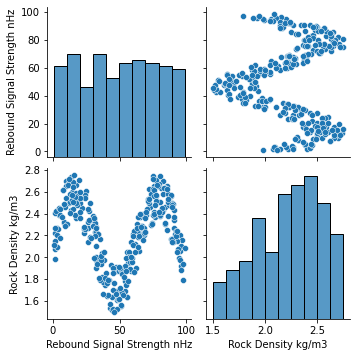

In [5]:
sns.pairplot(df)

In [6]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

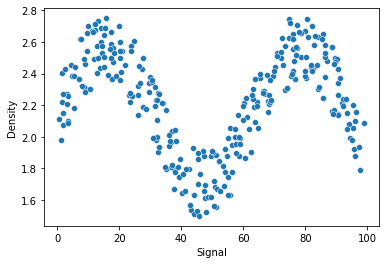

In [7]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_preds = lr_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [18]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [24]:
signal_range = np.arange(0, 100)
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

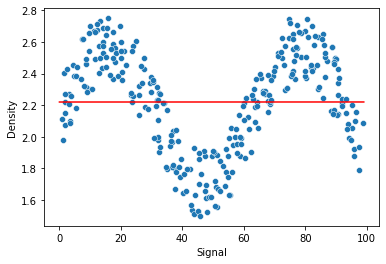

In [28]:
sns.scatterplot(x= 'Signal', y = 'Density', data = df)
plt.plot(signal_range, signal_preds, color = 'red')

In [47]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print("Mae: {}".format(mae))
    print("Rmse: {}".format(rmse))
    
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    plt.figure()
    sns.scatterplot(x='Signal', y ='Density', data = df)
    plt.plot(signal_range, signal_preds, color = 'red');

Mae: 0.211198973318633
Rmse: 0.2570051996584629


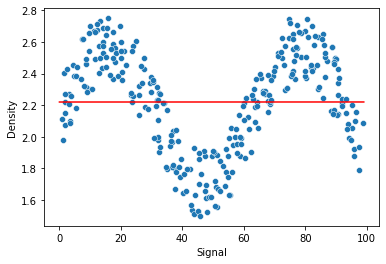

In [38]:
model = LinearRegression()
run_model(model, X_train, X_test, y_train, y_test)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [40]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

Mae: 0.2290310544351128
Rmse: 0.2817309563725583


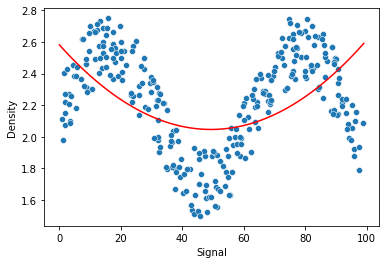

In [41]:
run_model(pipe, X_train, X_test, y_train, y_test)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

Mae: 0.11877297474442378
Rmse: 0.1523487028635337
Mae: 0.12198383614100558
Rmse: 0.13730685016923647
Mae: 0.11635971693292672
Rmse: 0.13277855732740926


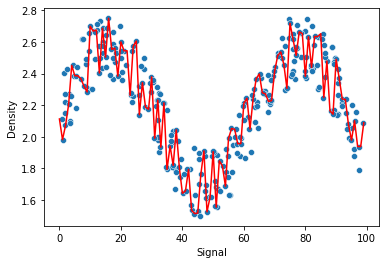

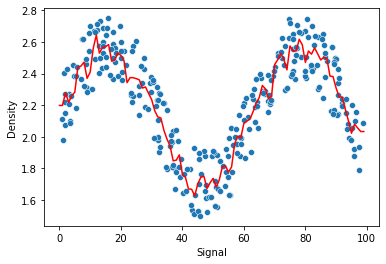

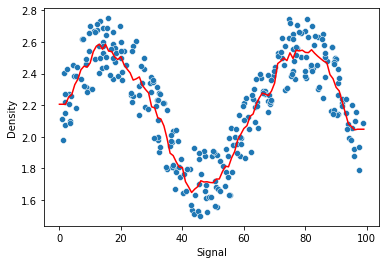

In [48]:
k_values = [1, 5, 10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,  X_train, X_test, y_train, y_test)

In [49]:
from sklearn.tree import DecisionTreeRegressor


Mae: 0.11877297474442378
Rmse: 0.1523487028635337


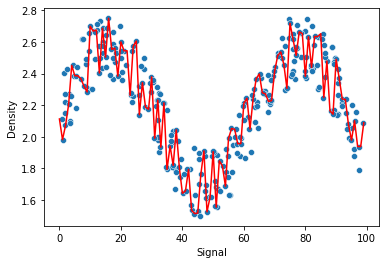

In [50]:
model = DecisionTreeRegressor()
run_model(model,  X_train, X_test, y_train, y_test)

In [51]:
from sklearn.svm import SVR

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma' : ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

Mae: 0.10854210121348368
Rmse: 0.12646999302046696


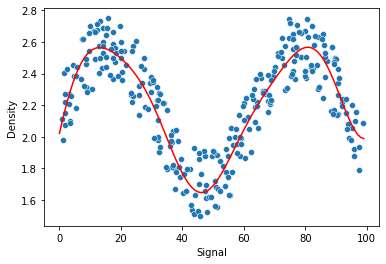

In [54]:
run_model(grid,  X_train, X_test, y_train, y_test)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model = RandomForestRegressor()

Mae: 0.11209014470740646
Rmse: 0.13288224793287662


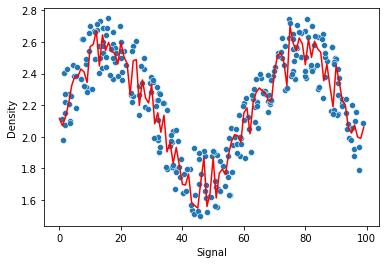

In [57]:
run_model(model,  X_train, X_test, y_train, y_test)